<a href="https://colab.research.google.com/github/ac-26/Telecom-Customer-Churn-Prediction/blob/main/telecom_churn_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data_url = "https://raw.githubusercontent.com/ac-26/CSI-25/refs/heads/main/Telco-Customer-Churn.csv"

In [3]:
df = pd.read_csv(data_url)

## **Exploratory Data Analysis (EDA)**

In [78]:
df.shape

(7043, 22)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Monthly charges is integer type and total charges is object type. We will have to handle this**

In [10]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [14]:
total_customers = len(df)
churned_customers = (df['Churn'] == 'Yes').sum()
churn_rate = (churned_customers / total_customers) * 100
churn_rate

np.float64(26.536987079369588)

### **We see that 26.5% of customers have churned, this shows class imbalance and we will have to handle it later**

In [15]:
print(f"Empty strings: {(df['TotalCharges'] == '').sum()}")
print(f"Space values: {(df['TotalCharges'] == ' ').sum()}")

Empty strings: 0
Space values: 11


### **These have space values lets analyse more closely if there is a reason for it to be like this or we can delete/impute them**

In [21]:
space_rows = df[df['TotalCharges'] == ' ']
space_rows[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

,customerID,tenure,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,52.55,,No
753,3115-CZMZD,0,20.25,,No
936,5709-LVOEQ,0,80.85,,No
1082,4367-NUYAO,0,25.75,,No
1340,1371-DWPAZ,0,56.05,,No
3331,7644-OMVMY,0,19.85,,No
3826,3213-VVOLG,0,25.35,,No
4380,2520-SGTTA,0,20.00,,No
5218,2923-ARZLG,0,19.70,,No
6670,4075-WKNIU,0,73.35,,No


### **So now clearly there is a reason for those to be empty spaces. These 11 records are those people who have just joined the service and they havent been billed yet. So instead of deleting it all together lets keep all these records and replace empty space with 0.**

In [23]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')

### **Fixing the datatype of the column**

In [24]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

### **Analysing the numerical columns**

In [28]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [30]:
df[numerical_cols].describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.73
std,0.37,24.56,30.09,2266.79
min,0.00,0.00,18.25,0.00
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


### **Visualising numerical features**

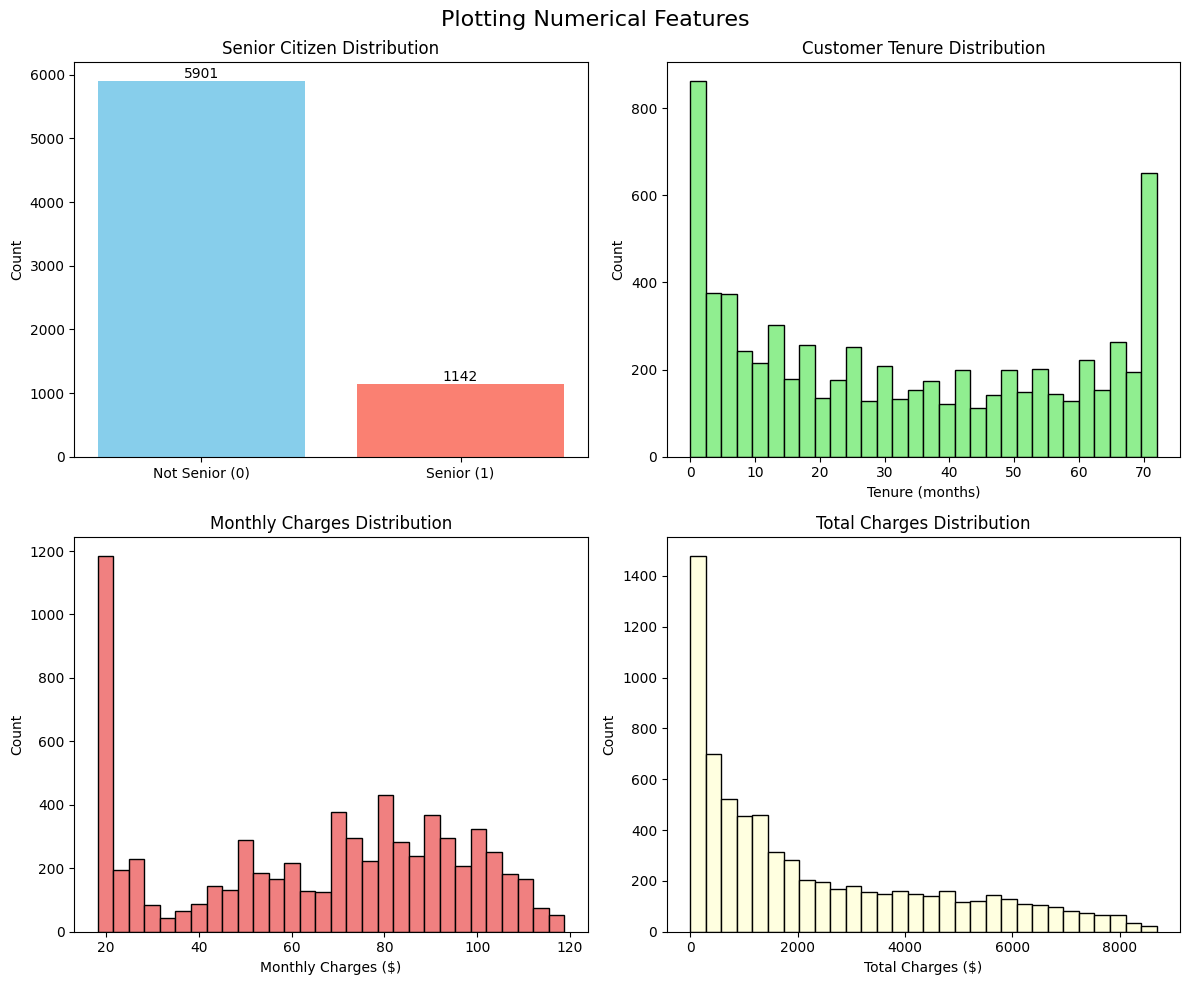

In [38]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Plotting Numerical Features', fontsize=16)

#senior citizen column
ax1 = axes[0, 0]
senior_counts = df['SeniorCitizen'].value_counts()
ax1.bar(['Not Senior (0)', 'Senior (1)'], senior_counts.values, color=['skyblue', 'salmon'])
ax1.set_title('Senior Citizen Distribution')
ax1.set_ylabel('Count')
for i, v in enumerate(senior_counts.values):
    ax1.text(i, v + 50, str(v), ha='center')

#tenure
ax2 = axes[0, 1]
ax2.hist(df['tenure'], bins=30, color='lightgreen', edgecolor='black')
ax2.set_title('Customer Tenure Distribution')
ax2.set_xlabel('Tenure (months)')
ax2.set_ylabel('Count')

#monthly charges
ax3 = axes[1, 0]
ax3.hist(df['MonthlyCharges'], bins=30, color='lightcoral', edgecolor='black')
ax3.set_title('Monthly Charges Distribution')
ax3.set_xlabel('Monthly Charges ($)')
ax3.set_ylabel('Count')

#total charges
ax4 = axes[1, 1]
ax4.hist(df['TotalCharges'], bins=30, color='lightyellow', edgecolor='black')
ax4.set_title('Total Charges Distribution')
ax4.set_xlabel('Total Charges ($)')
ax4.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [39]:
senior_rate = senior_counts[1] / senior_counts.sum() * 100
senior_rate

np.float64(16.21468124378816)

*   **There are 16% senior citizens - heavily skewed towards younger audience**
*   **Average customer stays 32 months, also there are lot of new customers (0-3 months)**
*   **Total charges also have high variation**




### **Analysing these features with Churn**

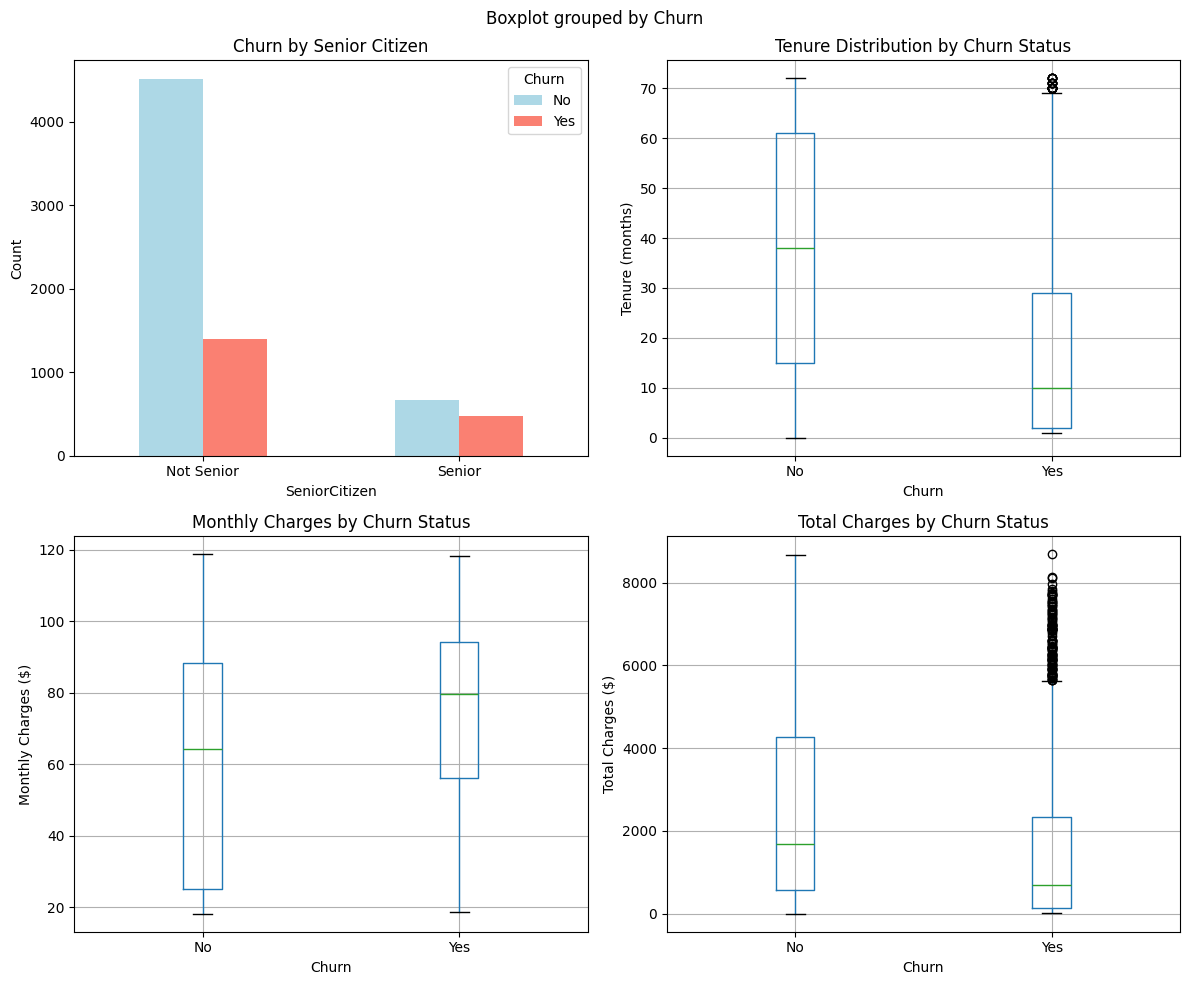

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#churn with senior citizen
ax1 = axes[0, 0]
churn_senior = pd.crosstab(df['SeniorCitizen'], df['Churn'])
churn_senior.plot(kind='bar', ax=ax1, color=['lightblue', 'salmon'])
ax1.set_xticklabels(['Not Senior', 'Senior'], rotation=0)
ax1.set_title('Churn by Senior Citizen')
ax1.set_ylabel('Count')
ax1.legend(title='Churn')

#churn by tenure
ax2 = axes[0, 1]
df.boxplot(column='tenure', by='Churn', ax=ax2)
ax2.set_title('Tenure Distribution by Churn Status')
ax2.set_xlabel('Churn')
ax2.set_ylabel('Tenure (months)')
plt.sca(ax2)
plt.xticks([1, 2], ['No', 'Yes'])

#churn by monthly charges
ax3 = axes[1, 0]
df.boxplot(column='MonthlyCharges', by='Churn', ax=ax3)
ax3.set_title('Monthly Charges by Churn Status')
ax3.set_xlabel('Churn')
ax3.set_ylabel('Monthly Charges ($)')
plt.sca(ax3)
plt.xticks([1, 2], ['No', 'Yes'])

#churn by total charges
ax4 = axes[1, 1]
df.boxplot(column='TotalCharges', by='Churn', ax=ax4)
ax4.set_title('Total Charges by Churn Status')
ax4.set_xlabel('Churn')
ax4.set_ylabel('Total Charges ($)')
plt.sca(ax4)
plt.xticks([1, 2], ['No', 'Yes'])

plt.tight_layout()
plt.show()

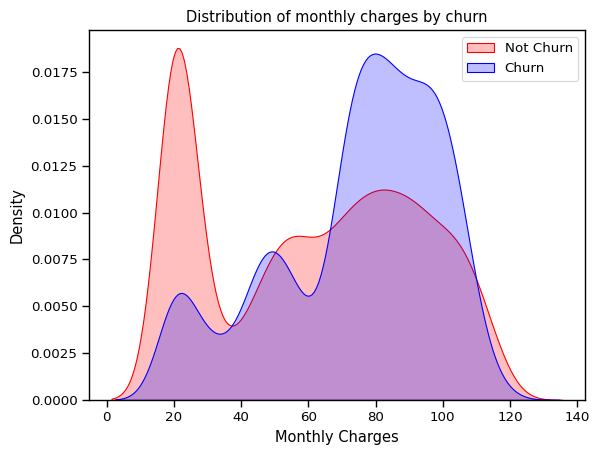

In [90]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

### **To make any more guesses we will have to calculate rate of each plot**

In [46]:
#churn rate by senior citizen
churn_by_senior = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
churn_by_senior.index = ['Not Senior', 'Senior']
churn_by_senior.round(2)

Churn,No,Yes
Not Senior,76.39,23.61
Senior,58.32,41.68


*   **Senior Citizen: Senior Citizen are more likely to churn, there can be many reasons to that for example they might not be comfortable with the pricing or they might need different servies as compared to younger audiences**
*   **Tenure: Customers who churn have much shorter tenure (10 months) compared to those who stay (38 months)**
*   **Monthly Charges: Churned customers pay higher monthly charges (80) as compared to non-churned (65)**
*   **Total Charges: Churned customers have much lower total charges which makes sense given their shorter tenure too**



### **I also observe some outliers in the box plot for tenure vs churn**

In [54]:
#this means there also exist long term customers who eventually churned, this tells me that this dataste is not so simple after all
churned_customers = df[df['Churn'] == 'Yes']
churned_customers['tenure'].describe()

,tenure
count,1869.000000
mean,17.979133
std,19.531123
min,1.000000
25%,2.000000
50%,10.000000
75%,29.000000
max,72.000000


In [55]:
high_tenure_churners = df[(df['tenure'] > 60) & (df['Churn'] == 'Yes')]
print(f"Number of long term customers who left: {len(high_tenure_churners)}")

Number of long term customers who left: 93


In [57]:
high_tenure_churners[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges','Contract', 'InternetService', 'PaymentMethod']].sort_values('tenure', ascending=False).head()

,customerID,tenure,MonthlyCharges,TotalCharges,Contract,InternetService,PaymentMethod
4610,2889-FPWRM,72,117.80,8684.80,One year,Fiber optic,Bank transfer (automatic)
3890,3886-CERTZ,72,109.25,8109.80,One year,Fiber optic,Electronic check
4513,8580-QVLOC,72,92.45,6440.25,Two year,DSL,Credit card (automatic)
3111,8809-RIHDD,72,103.40,7372.65,Two year,Fiber optic,Electronic check
3439,0917-EZOLA,72,104.15,7689.95,Two year,Fiber optic,Bank transfer (automatic)


### **Checking out where exactly churn is happening the most**

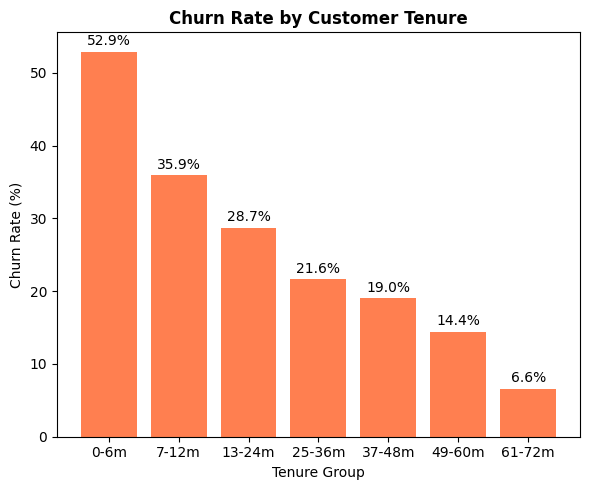

In [65]:
#binning tenure for visualisation
tenure_bins = [0, 6, 12, 24, 36, 48, 60, 72]
tenure_labels = ['0-6m', '7-12m', '13-24m', '25-36m', '37-48m', '49-60m', '61-72m']
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, include_lowest=True)

#churn rate by bins
churn_by_tenure_group = df.groupby('tenure_group').agg({
    'Churn': ['count', lambda x: (x == 'Yes').sum(), lambda x: (x == 'Yes').mean() * 100]
}).round(1)
churn_by_tenure_group.columns = ['Total_Customers', 'Churned', 'Churn_Rate_%']


fig, ax1 = plt.subplots(1, 1, figsize=(6, 5))

#bar chart of churn rate and tenure bins
tenure_groups = churn_by_tenure_group.index
churn_rates = churn_by_tenure_group['Churn_Rate_%']
bars = ax1.bar(tenure_groups, churn_rates, color='coral')
ax1.set_ylabel('Churn Rate (%)')
ax1.set_title('Churn Rate by Customer Tenure', fontweight='bold')
ax1.set_xlabel('Tenure Group')

#adding values on top of bars
for bar, rate in zip(bars, churn_rates):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **So now clearly we know that cutomers who are early in their tenure are more likely to churn. Those rows which we saw above with high tenure and churn are just outliers..we cant remove them also because they are high value rows with high total charges so lets keep it for now**

### **Analysing Categorical Features with Churn**

In [67]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')

In [69]:
print("Contract type distribution:")
df['Contract'].value_counts()


Contract type distribution:


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [77]:
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn.round(1)

Churn,No,Yes
Contract,,
Month-to-month,57.3,42.7
One year,88.7,11.3
Two year,97.2,2.8


In [83]:
payment_counts = df['PaymentMethod'].value_counts()

payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'])

payment_churn['Total'] = payment_churn.sum(axis=1)
payment_churn['Churn_Rate_%'] = (payment_churn['Yes'] / payment_churn['Total'] * 100).round(1)

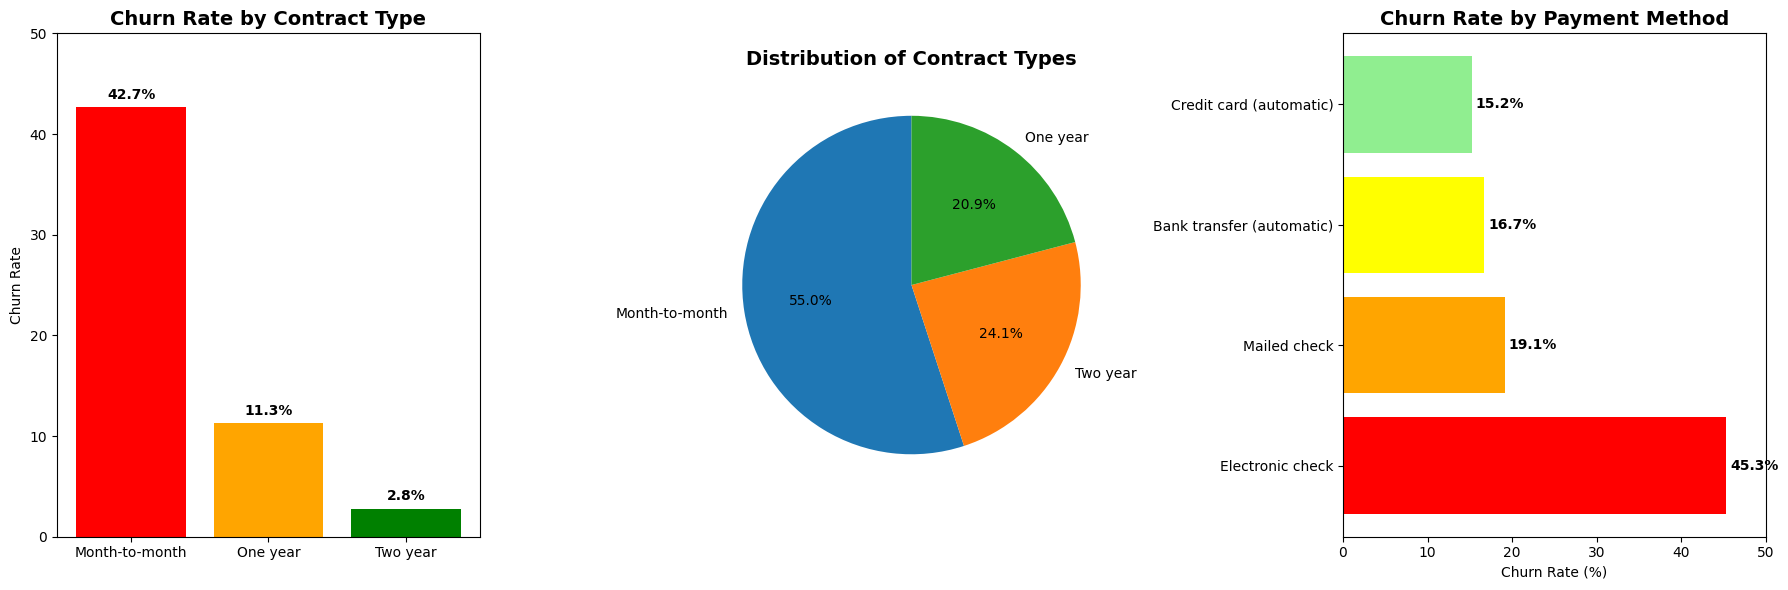

In [88]:
fig = plt.figure(figsize=(18, 6))

#contract tyoe and churn
ax1 = plt.subplot(1, 3, 1)
contract_churn_rates = [42.7, 11.3, 2.8]
contracts = ['Month-to-month', 'One year', 'Two year']
bars = ax1.bar(contracts, contract_churn_rates, color=['red', 'orange', 'green'])
ax1.set_ylabel('Churn Rate')
ax1.set_title('Churn Rate by Contract Type', fontweight='bold', fontsize=14)


for bar, rate in zip(bars, contract_churn_rates):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{rate}%', ha='center', va='bottom', fontweight='bold')
ax1.set_ylim(0, 50)

#contract type distribution
ax2 = plt.subplot(1, 3, 2)
contract_dist = df['Contract'].value_counts()
ax2.pie(contract_dist.values, labels=contract_dist.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribution of Contract Types', fontweight='bold', fontsize=14)

#payment method and churn
ax3 = plt.subplot(1, 3, 3)
payment_methods = payment_churn.index
churn_rates = payment_churn['Churn_Rate_%']
bars = ax3.barh(payment_methods, churn_rates, color=['red', 'orange', 'yellow', 'lightgreen'])
ax3.set_xlabel('Churn Rate (%)')
ax3.set_title('Churn Rate by Payment Method', fontweight='bold', fontsize=14)


for i, (method, rate) in enumerate(zip(payment_methods, churn_rates)):
    ax3.text(rate + 0.5, i, f'{rate}%', va='center', fontweight='bold')
ax3.set_xlim(0, 50)

plt.tight_layout()
plt.show()

*   **People with month to month contract have higher churn rates almost 50% which is comparitivley higher**
*   **Electronic check payment type has highe churn rate this is because maybe it is more tedious to manage as compared to automatic payment methods**




## **Data Preprocessing**

In [91]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-6m
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36m
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-6m
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48m
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-6m
